In [ ]:
!pip install polars -q

In [ ]:
!pip install lightgbm --install-option=--gpu -q


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [ ]:
import polars as pl
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Polars: {pl.__version__}")
print(f"LightGBM: {lgb.__version__}")

Polars: 1.31.0
LightGBM: 4.6.0


In [ ]:
!wget -q https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

In [ ]:
!ls -lh yellow_tripdata_2023-01.parquet

-rw-r--r-- 1 root root 46M Mar 20  2023 yellow_tripdata_2023-01.parquet


In [ ]:
import polars as pl

In [ ]:
df_lazy = pl.scan_parquet('yellow_tripdata_2023-01.parquet')

In [ ]:
print(df_lazy.schema)

Schema({'VendorID': Int64, 'tpep_pickup_datetime': Datetime(time_unit='ns', time_zone=None), 'tpep_dropoff_datetime': Datetime(time_unit='ns', time_zone=None), 'passenger_count': Float64, 'trip_distance': Float64, 'RatecodeID': Float64, 'store_and_fwd_flag': String, 'PULocationID': Int64, 'DOLocationID': Int64, 'payment_type': Int64, 'fare_amount': Float64, 'extra': Float64, 'mta_tax': Float64, 'tip_amount': Float64, 'tolls_amount': Float64, 'improvement_surcharge': Float64, 'total_amount': Float64, 'congestion_surcharge': Float64, 'airport_fee': Float64})


/tmp/ipython-input-2480285578.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  print(df_lazy.schema)


In [ ]:
df_lazy.head(5).collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
i64,datetime[ns],datetime[ns],f64,f64,f64,str,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,"""N""",161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0
2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.1,1.0,"""N""",43,237,1,7.9,1.0,0.5,4.0,0.0,1.0,16.9,2.5,0.0
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,"""N""",48,238,1,14.9,1.0,0.5,15.0,0.0,1.0,34.9,2.5,0.0
1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.9,1.0,"""N""",138,7,1,12.1,7.25,0.5,0.0,0.0,1.0,20.85,0.0,1.25
2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,"""N""",107,79,1,11.4,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0


In [ ]:
df = pl.read_parquet('yellow_tripdata_2023-01.parquet')

In [ ]:
def get_memory_usage(df):
    """Возвращает использование памяти в MB"""
    return df.estimated_size('mb')

In [ ]:
print(f"Размер датафрейма: {get_memory_usage(df):.2f} MB")
print(f"Количество строк: {len(df):,}")
print(f"Количество столбцов: {len(df.columns)}")

Размер датафрейма: 424.06 MB
Количество строк: 3,066,766
Количество столбцов: 19


In [ ]:
print("\n" + "="*50)
print("ТИПЫ ДАННЫХ:")
print("="*50)
for col in df.columns:
    dtype = df[col].dtype
    print(f"{col:30s} {str(dtype):15s}")


ТИПЫ ДАННЫХ:
VendorID                       Int64          
tpep_pickup_datetime           Datetime(time_unit='ns', time_zone=None)
tpep_dropoff_datetime          Datetime(time_unit='ns', time_zone=None)
passenger_count                Float64        
trip_distance                  Float64        
RatecodeID                     Float64        
store_and_fwd_flag             String         
PULocationID                   Int64          
DOLocationID                   Int64          
payment_type                   Int64          
fare_amount                    Float64        
extra                          Float64        
mta_tax                        Float64        
tip_amount                     Float64        
tolls_amount                   Float64        
improvement_surcharge          Float64        
total_amount                   Float64        
congestion_surcharge           Float64        
airport_fee                    Float64        


In [ ]:
df_optimized = df.with_columns([
    # Целочисленные ID - можно уменьшить
    pl.col('VendorID').cast(pl.Int8),
    pl.col('passenger_count').cast(pl.Int8),
    pl.col('RatecodeID').cast(pl.Int8),
    pl.col('PULocationID').cast(pl.Int16),
    pl.col('DOLocationID').cast(pl.Int16),
    pl.col('payment_type').cast(pl.Int8),

    # Float64 -> Float32 (достаточная точность для денег)
    pl.col('trip_distance').cast(pl.Float32),
    pl.col('fare_amount').cast(pl.Float32),
    pl.col('extra').cast(pl.Float32),
    pl.col('mta_tax').cast(pl.Float32),
    pl.col('tip_amount').cast(pl.Float32),
    pl.col('tolls_amount').cast(pl.Float32),
    pl.col('improvement_surcharge').cast(pl.Float32),
    pl.col('total_amount').cast(pl.Float32),
    pl.col('congestion_surcharge').cast(pl.Float32),
    pl.col('airport_fee').cast(pl.Float32),
])

In [ ]:
print(f"\nДо оптимизации:  {get_memory_usage(df):.2f} MB")
print(f"После оптимизации: {get_memory_usage(df_optimized):.2f} MB")
print(f"Экономия: {get_memory_usage(df) - get_memory_usage(df_optimized):.2f} MB")
print(f"Экономия: {(1 - get_memory_usage(df_optimized)/get_memory_usage(df))*100:.1f}%")

# Переключаемся на оптимизированную версию
df = df_optimized


До оптимизации:  424.06 MB
После оптимизации: 190.09 MB
Экономия: 233.98 MB
Экономия: 55.2%


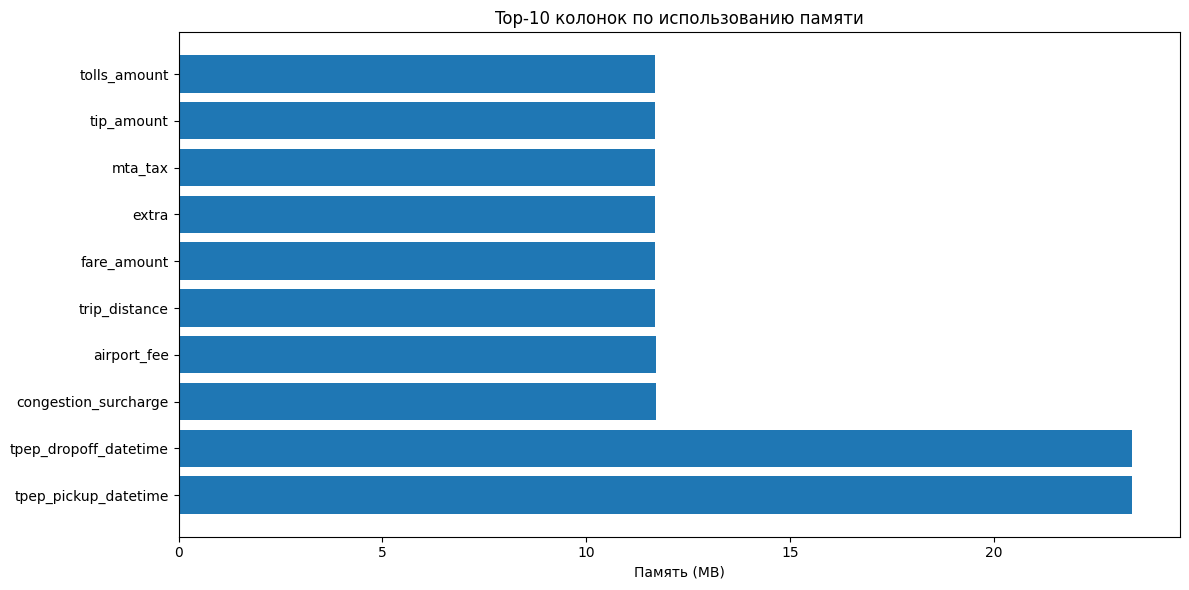

In [ ]:
memory_by_column = []
for col in df.columns:
    mem = df.select(pl.col(col)).estimated_size('mb')
    memory_by_column.append({'column': col, 'memory_mb': mem})

mem_df = pl.DataFrame(memory_by_column).sort('memory_mb', descending=True)

# Строим график
plt.figure(figsize=(12, 6))
plt.barh(mem_df['column'][:10], mem_df['memory_mb'][:10])
plt.xlabel('Память (MB)')
plt.title('Top-10 колонок по использованию памяти')
plt.tight_layout()
plt.show()

In [ ]:
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("="*50)
print(df.describe())

ИНФОРМАЦИЯ О ДАТАСЕТЕ
shape: (9, 20)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ VendorID  ┆ tpep_pick ┆ tpep_drop ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_ │
│ ---       ┆ ---       ┆ up_dateti ┆ off_datet ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ fee      │
│ str       ┆ f64       ┆ me        ┆ ime       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---      │
│           ┆           ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ f64      │
│           ┆           ┆ str       ┆ str       ┆   ┆ f64       ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 3.066766e ┆ 3066766   ┆ 3066766   ┆ … ┆ 3.066766e ┆ 3.066766e ┆ 2.995023e ┆ 2.995023 │
│           ┆ 6         ┆           ┆           ┆   ┆ 6         ┆ 6         ┆ 6         ┆ e6       │
│ null_coun ┆ 0.0       ┆ 0         ┆ 0         ┆ … ┆ 

In [ ]:
print("\n" + "="*50)
print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("="*50)
null_counts = df.null_count()
print(null_counts)


ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
shape: (1, 19)
┌──────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ VendorID ┆ tpep_pick ┆ tpep_drop ┆ passenger ┆ … ┆ improveme ┆ total_amo ┆ congestio ┆ airport_f │
│ ---      ┆ up_dateti ┆ off_datet ┆ _count    ┆   ┆ nt_surcha ┆ unt       ┆ n_surchar ┆ ee        │
│ u32      ┆ me        ┆ ime       ┆ ---       ┆   ┆ rge       ┆ ---       ┆ ge        ┆ ---       │
│          ┆ ---       ┆ ---       ┆ u32       ┆   ┆ ---       ┆ u32       ┆ ---       ┆ u32       │
│          ┆ u32       ┆ u32       ┆           ┆   ┆ u32       ┆           ┆ u32       ┆           │
╞══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0        ┆ 0         ┆ 0         ┆ 71743     ┆ … ┆ 0         ┆ 0         ┆ 71743     ┆ 71743     │
└──────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘


In [ ]:
null_percentage = (null_counts.to_dicts()[0])
for col, count in null_percentage.items():
    pct = (count / len(df)) * 100
    if pct > 0:
        print(f"{col}: {count:,} ({pct:.2f}%)")

passenger_count: 71,743 (2.34%)
RatecodeID: 71,743 (2.34%)
store_and_fwd_flag: 71,743 (2.34%)
congestion_surcharge: 71,743 (2.34%)
airport_fee: 71,743 (2.34%)


In [ ]:
print("\nАНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (fare_amount):")
print("="*50)

fare_stats = df.select([
    pl.col('fare_amount').min().alias('min'),
    pl.col('fare_amount').max().alias('max'),
    pl.col('fare_amount').mean().alias('mean'),
    pl.col('fare_amount').median().alias('median'),
    pl.col('fare_amount').quantile(0.25).alias('q25'),
    pl.col('fare_amount').quantile(0.75).alias('q75'),
    pl.col('fare_amount').quantile(0.95).alias('q95'),
    pl.col('fare_amount').quantile(0.99).alias('q99'),
])

print(fare_stats)


АНАЛИЗ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ (fare_amount):
shape: (1, 8)
┌────────┬─────────────┬───────────┬────────┬─────┬──────┬───────────┬───────────┐
│ min    ┆ max         ┆ mean      ┆ median ┆ q25 ┆ q75  ┆ q95       ┆ q99       │
│ ---    ┆ ---         ┆ ---       ┆ ---    ┆ --- ┆ ---  ┆ ---       ┆ ---       │
│ f32    ┆ f32         ┆ f32       ┆ f32    ┆ f32 ┆ f32  ┆ f32       ┆ f32       │
╞════════╪═════════════╪═══════════╪════════╪═════╪══════╪═══════════╪═══════════╡
│ -900.0 ┆ 1160.099976 ┆ 18.367069 ┆ 12.8   ┆ 8.6 ┆ 20.5 ┆ 65.300003 ┆ 72.300003 │
└────────┴─────────────┴───────────┴────────┴─────┴──────┴───────────┴───────────┘


In [ ]:
print("\nПРОБЛЕМНЫЕ ЗАПИСИ:")
print("="*50)

# 1. Отрицательная стоимость
negative_fare = df.filter(pl.col('fare_amount') < 0).height
print(f"Отрицательная стоимость: {negative_fare:,} записей")

# 2. Нулевое расстояние
zero_distance = df.filter(pl.col('trip_distance') == 0).height
print(f"Нулевое расстояние: {zero_distance:,} записей")

# 3. Невозможное количество пассажиров
weird_passengers = df.filter(
    (pl.col('passenger_count') < 1) | (pl.col('passenger_count') > 6)
).height
print(f"Странное кол-во пассажиров: {weird_passengers:,} записей")

# 4. Аномально дорогие поездки
expensive = df.filter(pl.col('fare_amount') > 200).height
print(f"Стоимость > $200: {expensive:,} записей")

# 5. Аномально дешевые поездки (при ненулевом расстоянии)
cheap = df.filter(
    (pl.col('fare_amount') < 2.5) & (pl.col('trip_distance') > 0)
).height
print(f"Подозрительно дешевые: {cheap:,} записей")


ПРОБЛЕМНЫЕ ЗАПИСИ:
Отрицательная стоимость: 25,049 записей
Нулевое расстояние: 45,862 записей
Странное кол-во пассажиров: 51,184 записей
Стоимость > $200: 852 записей
Подозрительно дешевые: 22,600 записей


In [ ]:
print("\nОЧИСТКА ДАННЫХ...")
print("="*50)

initial_rows = len(df)

# Применяем фильтры
df_clean = df.filter(
    # Убираем отрицательные и нулевые значения
    (pl.col('fare_amount') > 0) &
    (pl.col('trip_distance') > 0) &
    (pl.col('passenger_count') >= 1) &
    (pl.col('passenger_count') <= 6) &

    # Убираем экстремальные выбросы
    (pl.col('fare_amount') < 200) &
    (pl.col('trip_distance') < 100) &

    # Убираем слишком короткие поездки (вероятно ошибки)
    (pl.col('fare_amount') >= 2.5) &

    # Убираем null значения в важных колонках
    pl.col('fare_amount').is_not_null() &
    pl.col('trip_distance').is_not_null() &
    pl.col('tpep_pickup_datetime').is_not_null() &
    pl.col('tpep_dropoff_datetime').is_not_null()
)

final_rows = len(df_clean)
removed = initial_rows - final_rows

print(f"Было строк: {initial_rows:,}")
print(f"Осталось строк: {final_rows:,}")
print(f"Удалено: {removed:,} ({removed/initial_rows*100:.2f}%)")

# Обновляем датафрейм
df = df_clean


ОЧИСТКА ДАННЫХ...
Было строк: 3,066,766
Осталось строк: 2,883,393
Удалено: 183,373 (5.98%)


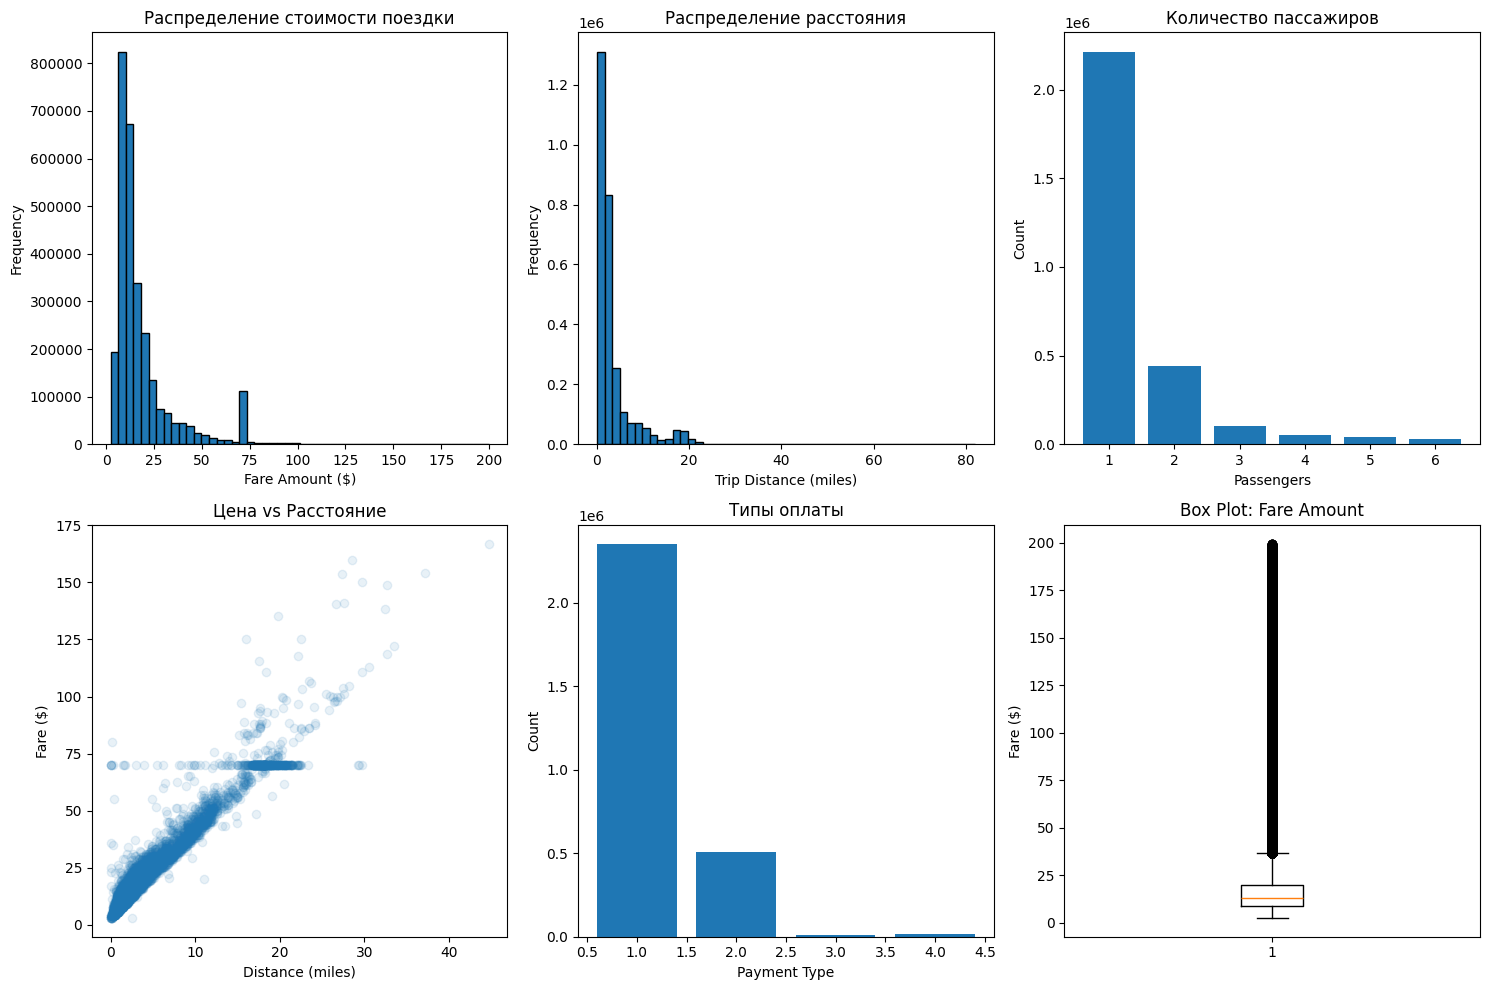

In [ ]:
# Создаем несколько графиков
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Распределение стоимости
axes[0, 0].hist(df['fare_amount'].to_numpy(), bins=50, edgecolor='black')
axes[0, 0].set_title('Распределение стоимости поездки')
axes[0, 0].set_xlabel('Fare Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# 2. Распределение расстояния
axes[0, 1].hist(df['trip_distance'].to_numpy(), bins=50, edgecolor='black')
axes[0, 1].set_title('Распределение расстояния')
axes[0, 1].set_xlabel('Trip Distance (miles)')
axes[0, 1].set_ylabel('Frequency')

# 3. Количество пассажиров
passenger_counts = df['passenger_count'].value_counts().sort('passenger_count')
axes[0, 2].bar(
    passenger_counts['passenger_count'].to_numpy(),
    passenger_counts['count'].to_numpy()
)
axes[0, 2].set_title('Количество пассажиров')
axes[0, 2].set_xlabel('Passengers')
axes[0, 2].set_ylabel('Count')

# 4. Зависимость цены от расстояния (sample)
sample = df.sample(n=10000, seed=42)
axes[1, 0].scatter(
    sample['trip_distance'].to_numpy(),
    sample['fare_amount'].to_numpy(),
    alpha=0.1
)
axes[1, 0].set_title('Цена vs Расстояние')
axes[1, 0].set_xlabel('Distance (miles)')
axes[1, 0].set_ylabel('Fare ($)')

# 5. Типы оплаты
payment_counts = df['payment_type'].value_counts().sort('payment_type')
axes[1, 1].bar(
    payment_counts['payment_type'].to_numpy(),
    payment_counts['count'].to_numpy()
)
axes[1, 1].set_title('Типы оплаты')
axes[1, 1].set_xlabel('Payment Type')
axes[1, 1].set_ylabel('Count')

# 6. Box plot для стоимости
axes[1, 2].boxplot(df['fare_amount'].to_numpy())
axes[1, 2].set_title('Box Plot: Fare Amount')
axes[1, 2].set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

In [ ]:
print("СОЗДАНИЕ ПРИЗНАКОВ...")
print("="*50)

df_features = df.with_columns([
    # Извлекаем компоненты даты
    pl.col('tpep_pickup_datetime').dt.hour().alias('pickup_hour'),
    pl.col('tpep_pickup_datetime').dt.day().alias('pickup_day'),
    pl.col('tpep_pickup_datetime').dt.month().alias('pickup_month'),
    pl.col('tpep_pickup_datetime').dt.weekday().alias('pickup_weekday'),

    # Длительность поездки в минутах
    (
        (pl.col('tpep_dropoff_datetime') - pl.col('tpep_pickup_datetime'))
        .dt.total_minutes()
    ).alias('trip_duration_minutes'),
])

# Создаем бинарные признаки
df_features = df_features.with_columns([
    # Час пик (7-9 утра и 17-19 вечера)
    (
        ((pl.col('pickup_hour') >= 7) & (pl.col('pickup_hour') <= 9)) |
        ((pl.col('pickup_hour') >= 17) & (pl.col('pickup_hour') <= 19))
    ).cast(pl.Int8).alias('is_rush_hour'),

    # Выходной день
    (pl.col('pickup_weekday') >= 5).cast(pl.Int8).alias('is_weekend'),

    # Ночное время (23-6)
    (
        (pl.col('pickup_hour') >= 23) | (pl.col('pickup_hour') <= 6)
    ).cast(pl.Int8).alias('is_night'),
])

# Вычисляем среднюю скорость (мили/час)
df_features = df_features.with_columns([
    (
        pl.col('trip_distance') / (pl.col('trip_duration_minutes') / 60)
    ).alias('avg_speed_mph')
])

# Обрабатываем бесконечные значения (деление на 0)
df_features = df_features.with_columns([
    pl.when(pl.col('avg_speed_mph').is_infinite())
    .then(0)
    .otherwise(pl.col('avg_speed_mph'))
    .alias('avg_speed_mph')
])

print(f"Создано признаков. Всего колонок: {len(df_features.columns)}")

# Смотрим на новые признаки
print("\nПримеры новых признаков:")
print(df_features.select([
    'tpep_pickup_datetime',
    'pickup_hour',
    'pickup_weekday',
    'is_rush_hour',
    'is_weekend',
    'is_night',
    'trip_duration_minutes',
    'avg_speed_mph'
]).head(10))

СОЗДАНИЕ ПРИЗНАКОВ...
Создано признаков. Всего колонок: 28

Примеры новых признаков:
shape: (10, 8)
┌────────────┬────────────┬────────────┬────────────┬───────────┬──────────┬───────────┬───────────┐
│ tpep_picku ┆ pickup_hou ┆ pickup_wee ┆ is_rush_ho ┆ is_weeken ┆ is_night ┆ trip_dura ┆ avg_speed │
│ p_datetime ┆ r          ┆ kday       ┆ ur         ┆ d         ┆ ---      ┆ tion_minu ┆ _mph      │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ i8       ┆ tes       ┆ ---       │
│ datetime[n ┆ i8         ┆ i8         ┆ i8         ┆ i8        ┆          ┆ ---       ┆ f64       │
│ s]         ┆            ┆            ┆            ┆           ┆          ┆ i64       ┆           │
╞════════════╪════════════╪════════════╪════════════╪═══════════╪══════════╪═══════════╪═══════════╡
│ 2023-01-01 ┆ 0          ┆ 7          ┆ 0          ┆ 1         ┆ 1        ┆ 8         ┆ 7.275     │
│ 00:32:10   ┆            ┆            ┆            ┆           ┆          ┆           ┆    

In [ ]:
# Анализ влияния времени на стоимость
print("\n" + "="*50)
print("ВЛИЯНИЕ ВРЕМЕНИ НА СТОИМОСТЬ:")
print("="*50)

# Средняя стоимость по часам
hourly_avg = df_features.group_by('pickup_hour').agg([
    pl.col('fare_amount').mean().alias('avg_fare'),
    pl.col('fare_amount').count().alias('count')
]).sort('pickup_hour')

print("\nСредняя стоимость по часам:")
print(hourly_avg)

# Сравнение час пик vs обычное время
rush_vs_normal = df_features.group_by('is_rush_hour').agg([
    pl.col('fare_amount').mean().alias('avg_fare'),
    pl.col('trip_distance').mean().alias('avg_distance'),
    pl.col('fare_amount').count().alias('count')
])

print("\nЧас пик vs обычное время:")
print(rush_vs_normal)

# Выходные vs будни
weekend_vs_weekday = df_features.group_by('is_weekend').agg([
    pl.col('fare_amount').mean().alias('avg_fare'),
    pl.col('trip_distance').mean().alias('avg_distance'),
    pl.col('fare_amount').count().alias('count')
])

print("\nВыходные vs будни:")
print(weekend_vs_weekday)


ВЛИЯНИЕ ВРЕМЕНИ НА СТОИМОСТЬ:

Средняя стоимость по часам:
shape: (24, 3)
┌─────────────┬───────────┬────────┐
│ pickup_hour ┆ avg_fare  ┆ count  │
│ ---         ┆ ---       ┆ ---    │
│ i8          ┆ f32       ┆ u32    │
╞═════════════╪═══════════╪════════╡
│ 0           ┆ 19.709862 ┆ 79535  │
│ 1           ┆ 17.765276 ┆ 55551  │
│ 2           ┆ 16.633503 ┆ 38711  │
│ 3           ┆ 17.635439 ┆ 25041  │
│ 4           ┆ 22.159561 ┆ 15829  │
│ …           ┆ …         ┆ …      │
│ 19          ┆ 17.595211 ┆ 182633 │
│ 20          ┆ 17.959661 ┆ 157328 │
│ 21          ┆ 18.451017 ┆ 153353 │
│ 22          ┆ 19.324842 ┆ 139915 │
│ 23          ┆ 20.50629  ┆ 108301 │
└─────────────┴───────────┴────────┘

Час пик vs обычное время:
shape: (2, 4)
┌──────────────┬───────────┬──────────────┬─────────┐
│ is_rush_hour ┆ avg_fare  ┆ avg_distance ┆ count   │
│ ---          ┆ ---       ┆ ---          ┆ ---     │
│ i8           ┆ f32       ┆ f32          ┆ u32     │
╞══════════════╪═══════════╪═══════════

/tmp/ipython-input-1091812473.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(weekend_data, labels=['Будни', 'Выходные'])


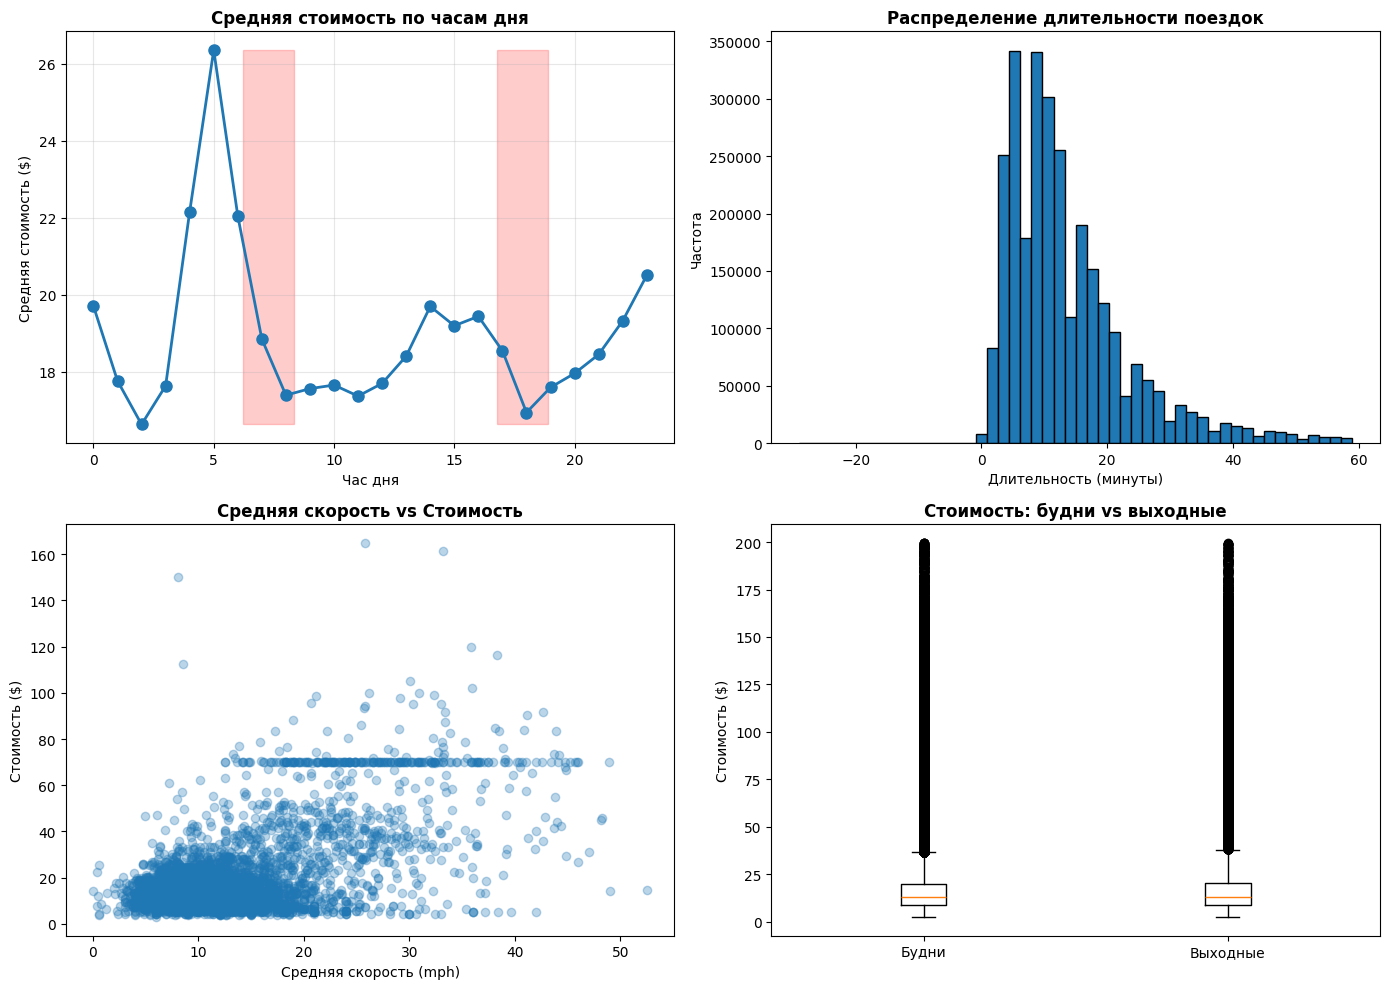

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Средняя стоимость по часам
hours = hourly_avg['pickup_hour'].to_numpy()
avg_fares = hourly_avg['avg_fare'].to_numpy()
axes[0, 0].plot(hours, avg_fares, marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Средняя стоимость по часам дня', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Час дня')
axes[0, 0].set_ylabel('Средняя стоимость ($)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhspan(ymin=avg_fares.min(), ymax=avg_fares.max(),
                     xmin=7/24, xmax=9/24, alpha=0.2, color='red', label='Утренний час пик')
axes[0, 0].axhspan(ymin=avg_fares.min(), ymax=avg_fares.max(),
                     xmin=17/24, xmax=19/24, alpha=0.2, color='red', label='Вечерний час пик')

# 2. Распределение длительности поездок
duration_data = df_features.filter(
    pl.col('trip_duration_minutes') < 60  # Фокусируемся на поездках до часа
)['trip_duration_minutes'].to_numpy()

axes[0, 1].hist(duration_data, bins=50, edgecolor='black')
axes[0, 1].set_title('Распределение длительности поездок', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Длительность (минуты)')
axes[0, 1].set_ylabel('Частота')

# 3. Средняя скорость vs стоимость
sample_speed = df_features.filter(
    (pl.col('avg_speed_mph') > 0) & (pl.col('avg_speed_mph') < 60)
).sample(n=5000, seed=42)

axes[1, 0].scatter(
    sample_speed['avg_speed_mph'].to_numpy(),
    sample_speed['fare_amount'].to_numpy(),
    alpha=0.3
)
axes[1, 0].set_title('Средняя скорость vs Стоимость', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Средняя скорость (mph)')
axes[1, 0].set_ylabel('Стоимость ($)')

# 4. Стоимость: будни vs выходные
weekend_data = [
    df_features.filter(pl.col('is_weekend') == 0)['fare_amount'].to_numpy(),
    df_features.filter(pl.col('is_weekend') == 1)['fare_amount'].to_numpy()
]

axes[1, 1].boxplot(weekend_data, labels=['Будни', 'Выходные'])
axes[1, 1].set_title('Стоимость: будни vs выходные', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Стоимость ($)')

plt.tight_layout()
plt.show()

In [ ]:
print("ПОДГОТОВКА ДАННЫХ ДЛЯ ОБУЧЕНИЯ...")
print("="*50)

# Выбираем признаки для модели
feature_columns = [
    # Основные характеристики поездки
    'trip_distance',
    'passenger_count',
    'RatecodeID',
    'PULocationID',
    'DOLocationID',
    'payment_type',

    # Временные признаки
    'pickup_hour',
    'pickup_day',
    'pickup_month',
    'pickup_weekday',
    'trip_duration_minutes',

    # Бинарные признаки
    'is_rush_hour',
    'is_weekend',
    'is_night',

    # Вычисленные признаки
    'avg_speed_mph',
]

target_column = 'fare_amount'

# Создаем X и y
X = df_features.select(feature_columns).to_pandas()
y = df_features.select(target_column).to_pandas()[target_column]

print(f"Размер X: {X.shape}")
print(f"Размер y: {y.shape}")
print(f"\nПризнаки для обучения:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"\nTrain set: {X_train.shape[0]:,} samples")
print(f"Test set:  {X_test.shape[0]:,} samples")

ПОДГОТОВКА ДАННЫХ ДЛЯ ОБУЧЕНИЯ...
Размер X: (2883393, 15)
Размер y: (2883393,)

Признаки для обучения:
 1. trip_distance
 2. passenger_count
 3. RatecodeID
 4. PULocationID
 5. DOLocationID
 6. payment_type
 7. pickup_hour
 8. pickup_day
 9. pickup_month
10. pickup_weekday
11. trip_duration_minutes
12. is_rush_hour
13. is_weekend
14. is_night
15. avg_speed_mph

Train set: 2,306,714 samples
Test set:  576,679 samples


In [ ]:
from sklearn.linear_model import LinearRegression
import time

print("\n" + "="*50)
print("BASELINE: LINEAR REGRESSION")
print("="*50)

start_time = time.time()

# Обучаем простую линейную регрессию
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

training_time = time.time() - start_time

# Предсказания
y_pred_lr = lr_model.predict(X_test)

# Метрики
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Время обучения: {training_time:.2f} сек")
print(f"RMSE: ${rmse_lr:.2f}")
print(f"MAE:  ${mae_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")



BASELINE: LINEAR REGRESSION
Время обучения: 1.20 сек
RMSE: $4.41
MAE:  $1.95
R²:   0.9289


In [ ]:
print("\n" + "="*50)
print("LIGHTGBM С GPU УСКОРЕНИЕМ")
print("="*50)

# Проверяем доступность GPU
print("Проверка GPU...")
!nvidia-smi --query-gpu=name --format=csv,noheader

# Параметры LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'device': 'gpu',  # Используем GPU!
    'gpu_platform_id': 0,
    'gpu_device_id': 0,

    # Параметры модели
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

print("\nПараметры модели:")
for key, value in params.items():
    print(f"  {key}: {value}")

# Создаем модель
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    **params
)

# Обучаем с отслеживанием времени
print("\nОбучение модели...")
start_time = time.time()

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=False)]
)

training_time = time.time() - start_time

print(f"✓ Обучение завершено за {training_time:.2f} сек")
print(f"  Использовано деревьев: {lgb_model.n_estimators}")

# Предсказания
y_pred_lgb = lgb_model.predict(X_test)

# Метрики
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"\nРЕЗУЛЬТАТЫ:")
print(f"RMSE: ${rmse_lgb:.2f}")
print(f"MAE:  ${mae_lgb:.2f}")
print(f"R²:   {r2_lgb:.4f}")


LIGHTGBM С GPU УСКОРЕНИЕМ
Проверка GPU...
Tesla T4

Параметры модели:
  objective: regression
  metric: rmse
  device: gpu
  gpu_platform_id: 0
  gpu_device_id: 0
  num_leaves: 31
  learning_rate: 0.1
  feature_fraction: 0.8
  bagging_fraction: 0.8
  bagging_freq: 5
  verbose: 0
  random_state: 42

Обучение модели...
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bag

In [ ]:
print("\n" + "="*50)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)

comparison = pl.DataFrame({
    'Модель': ['Linear Regression', 'LightGBM (GPU)'],
    'RMSE': [rmse_lr, rmse_lgb],
    'MAE': [mae_lr, mae_lgb],
    'R²': [r2_lr, r2_lgb],
})

print(comparison)

# Улучшение в процентах
improvement_rmse = (rmse_lr - rmse_lgb) / rmse_lr * 100
improvement_mae = (mae_lr - mae_lgb) / mae_lr * 100

print(f"\nУлучшение LightGBM:")
print(f"  RMSE: {improvement_rmse:.1f}% лучше")
print(f"  MAE:  {improvement_mae:.1f}% лучше")


СРАВНЕНИЕ МОДЕЛЕЙ
shape: (2, 4)
┌───────────────────┬──────────┬──────────┬──────────┐
│ Модель            ┆ RMSE     ┆ MAE      ┆ R²       │
│ ---               ┆ ---      ┆ ---      ┆ ---      │
│ str               ┆ f64      ┆ f64      ┆ f64      │
╞═══════════════════╪══════════╪══════════╪══════════╡
│ Linear Regression ┆ 4.41088  ┆ 1.945883 ┆ 0.928891 │
│ LightGBM (GPU)    ┆ 1.699701 ┆ 0.634627 ┆ 0.989441 │
└───────────────────┴──────────┴──────────┴──────────┘

Улучшение LightGBM:
  RMSE: 61.5% лучше
  MAE:  67.4% лучше



ВАЖНОСТЬ ПРИЗНАКОВ (TOP-10)
shape: (10, 2)
┌───────────────────────┬────────────┐
│ feature               ┆ importance │
│ ---                   ┆ ---        │
│ str                   ┆ i32        │
╞═══════════════════════╪════════════╡
│ trip_duration_minutes ┆ 609        │
│ RatecodeID            ┆ 550        │
│ trip_distance         ┆ 546        │
│ avg_speed_mph         ┆ 333        │
│ DOLocationID          ┆ 275        │
│ PULocationID          ┆ 218        │
│ pickup_hour           ┆ 132        │
│ pickup_day            ┆ 122        │
│ passenger_count       ┆ 57         │
│ payment_type          ┆ 50         │
└───────────────────────┴────────────┘


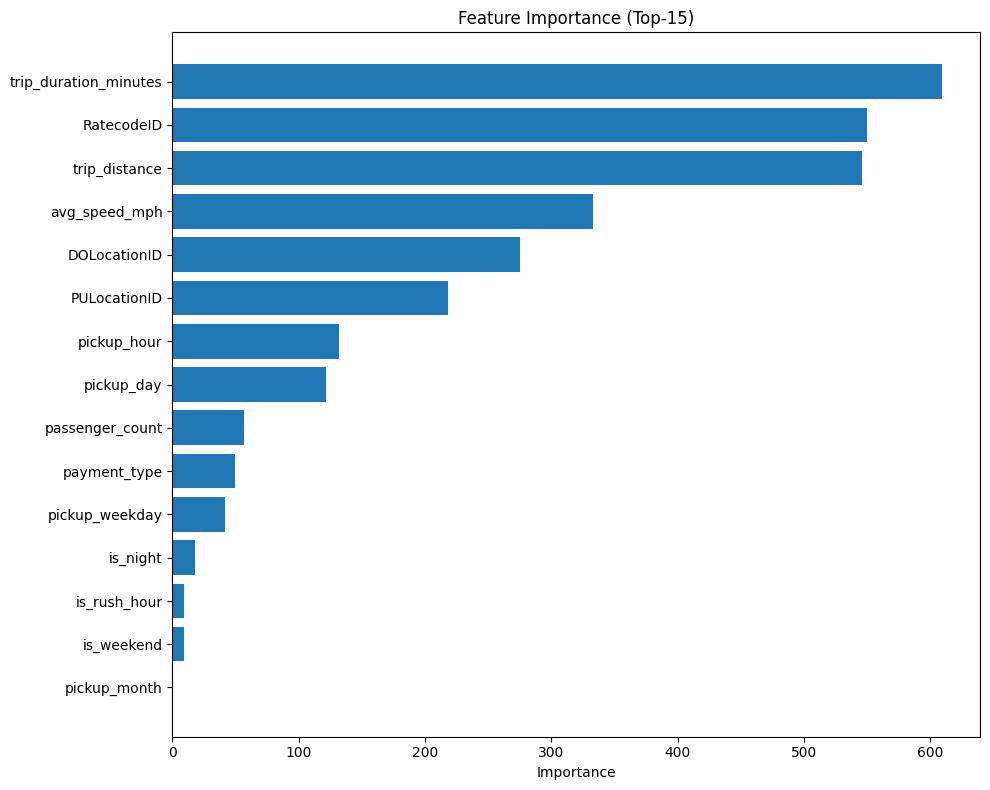

In [ ]:
# Получаем важность признаков
feature_importance = pl.DataFrame({
    'feature': feature_columns,
    'importance': lgb_model.feature_importances_
}).sort('importance', descending=True)

print("\n" + "="*50)
print("ВАЖНОСТЬ ПРИЗНАКОВ (TOP-10)")
print("="*50)
print(feature_importance.head(10))

# Визуализация
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(
    top_features['feature'].to_list(),
    top_features['importance'].to_list()
)
plt.xlabel('Importance')
plt.title('Feature Importance (Top-15)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
print("АНАЛИЗ ОШИБОК МОДЕЛИ")
print("="*50)

# Вычисляем ошибки
errors = y_test - y_pred_lgb
abs_errors = np.abs(errors)

# Статистика ошибок
print(f"\nСтатистика ошибок предсказаний:")
print(f"Средняя ошибка: ${np.mean(errors):.2f}")
print(f"Медианная ошибка: ${np.median(errors):.2f}")
print(f"Средняя абсолютная ошибка: ${np.mean(abs_errors):.2f}")
print(f"Максимальная ошибка: ${np.max(abs_errors):.2f}")

# Процент предсказаний с ошибкой < $2
good_predictions = np.sum(abs_errors < 2) / len(abs_errors) * 100
print(f"\nПредсказаний с ошибкой < $2: {good_predictions:.1f}%")

# Процент предсказаний с ошибкой < $5
ok_predictions = np.sum(abs_errors < 5) / len(abs_errors) * 100
print(f"Предсказаний с ошибкой < $5: {ok_predictions:.1f}%")

АНАЛИЗ ОШИБОК МОДЕЛИ

Статистика ошибок предсказаний:
Средняя ошибка: $0.00
Медианная ошибка: $0.05
Средняя абсолютная ошибка: $0.63
Максимальная ошибка: $171.81

Предсказаний с ошибкой < $2: 95.8%
Предсказаний с ошибкой < $5: 99.3%


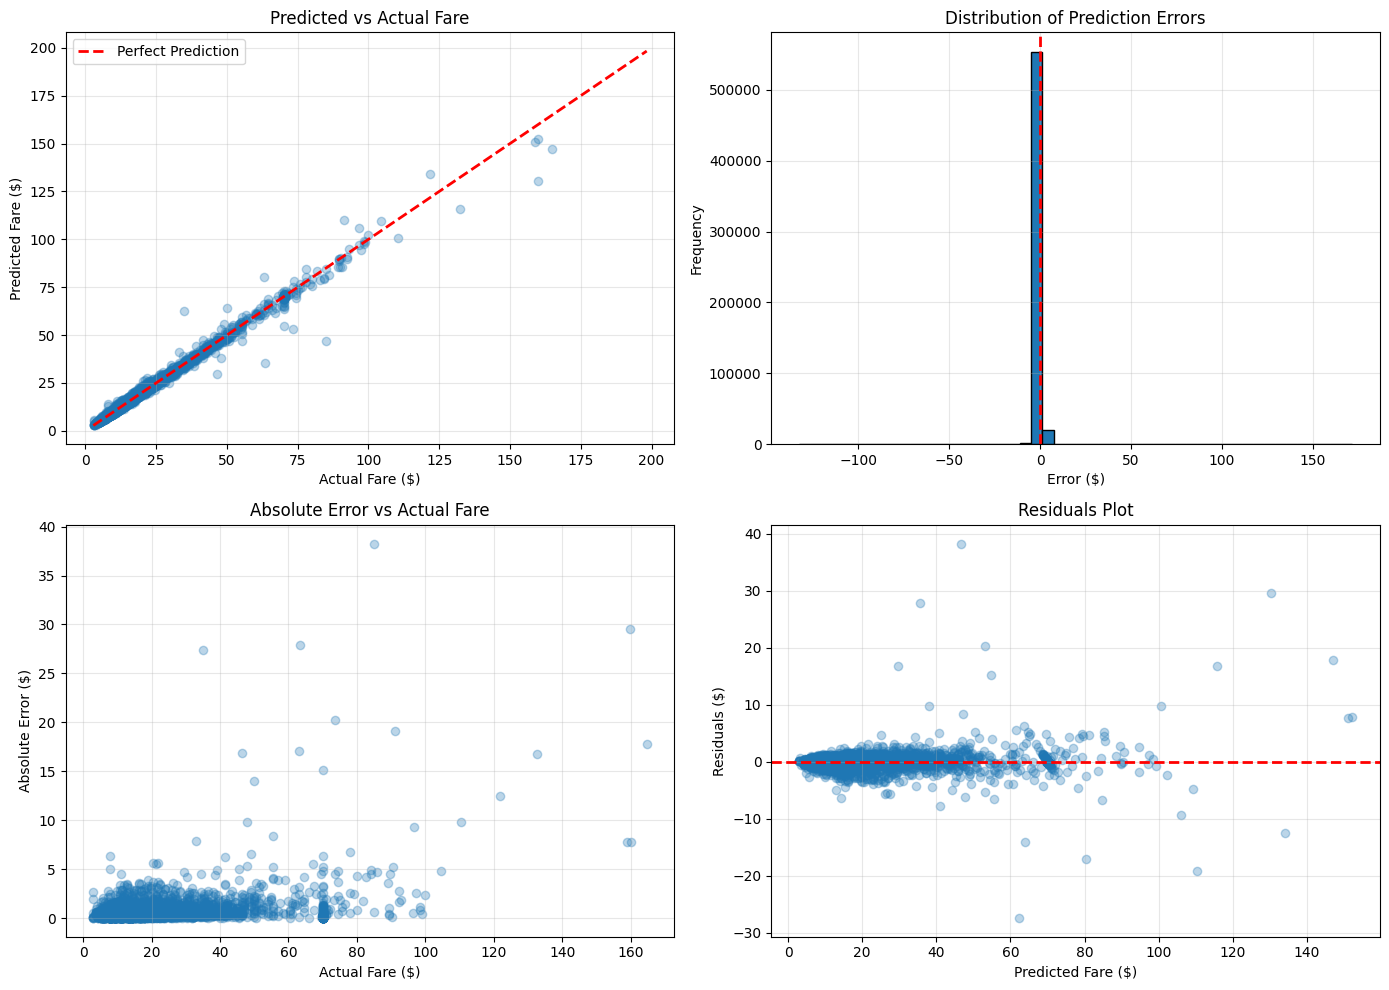

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Конвертируем все в numpy для корректной индексации
y_test_array = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred_array = np.array(y_pred_lgb)
errors_array = np.array(errors)
abs_errors_array = np.array(abs_errors)

# 1. Predicted vs Actual (sample для скорости)
sample_size = 5000
sample_indices = np.random.choice(len(y_test_array), sample_size, replace=False)
y_test_sample = y_test_array[sample_indices]
y_pred_sample = y_pred_array[sample_indices]

axes[0, 0].scatter(y_test_sample, y_pred_sample, alpha=0.3)
axes[0, 0].plot([y_test_array.min(), y_test_array.max()],
                 [y_test_array.min(), y_test_array.max()],
                 'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Fare ($)')
axes[0, 0].set_ylabel('Predicted Fare ($)')
axes[0, 0].set_title('Predicted vs Actual Fare')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Распределение ошибок
axes[0, 1].hist(errors_array, bins=50, edgecolor='black')
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Error ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Prediction Errors')
axes[0, 1].grid(True, alpha=0.3)

# 3. Абсолютные ошибки vs фактическая цена
axes[1, 0].scatter(y_test_sample, abs_errors_array[sample_indices], alpha=0.3)
axes[1, 0].set_xlabel('Actual Fare ($)')
axes[1, 0].set_ylabel('Absolute Error ($)')
axes[1, 0].set_title('Absolute Error vs Actual Fare')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals plot
axes[1, 1].scatter(y_pred_sample, errors_array[sample_indices], alpha=0.3)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Fare ($)')
axes[1, 1].set_ylabel('Residuals ($)')
axes[1, 1].set_title('Residuals Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*50)
print("ПРИМЕРЫ ПРЕДСКАЗАНИЙ")
print("="*50)

# Берем случайные примеры
n_examples = 10
random_indices = np.random.choice(len(X_test), n_examples, replace=False)

examples = pl.DataFrame({
    'Фактическая цена': y_test.iloc[random_indices].values,
    'Предсказание': y_pred_lgb[random_indices],
    'Ошибка': y_test.iloc[random_indices].values - y_pred_lgb[random_indices],
    'Расстояние (мили)': X_test['trip_distance'].iloc[random_indices].values,
    'Пассажиры': X_test['passenger_count'].iloc[random_indices].values,
    'Час': X_test['pickup_hour'].iloc[random_indices].values,
})

print(examples)


ПРИМЕРЫ ПРЕДСКАЗАНИЙ
shape: (10, 6)
┌──────────────────┬──────────────┬───────────┬───────────────────┬───────────┬─────┐
│ Фактическая цена ┆ Предсказание ┆ Ошибка    ┆ Расстояние (мили) ┆ Пассажиры ┆ Час │
│ ---              ┆ ---          ┆ ---       ┆ ---               ┆ ---       ┆ --- │
│ f32              ┆ f64          ┆ f64       ┆ f32               ┆ i8        ┆ i8  │
╞══════════════════╪══════════════╪═══════════╪═══════════════════╪═══════════╪═════╡
│ 12.1             ┆ 13.14243     ┆ -1.04243  ┆ 1.2               ┆ 1         ┆ 10  │
│ 7.9              ┆ 8.151298     ┆ -0.251298 ┆ 1.01              ┆ 1         ┆ 18  │
│ 13.5             ┆ 14.654114    ┆ -1.154114 ┆ 2.91              ┆ 1         ┆ 9   │
│ 39.400002        ┆ 40.26766     ┆ -0.867658 ┆ 7.29              ┆ 2         ┆ 23  │
│ 11.4             ┆ 11.331258    ┆ 0.068742  ┆ 1.6               ┆ 1         ┆ 22  │
│ 26.799999        ┆ 26.300818    ┆ 0.499181  ┆ 4.02              ┆ 2         ┆ 15  │
│ 12.1           

In [ ]:
print("\n" + "="*50)
print("ВЫВОДЫ")
print("="*50)

print(f"""
 ДОСТИЖЕНИЯ:
- Обучили модель на {len(X_train):,} примерах за {training_time:.1f} секунд
- Средняя ошибка предсказания: ${mae_lgb:.2f}
- R² Score: {r2_lgb:.4f} (объясняем {r2_lgb*100:.1f}% вариации)
- {good_predictions:.1f}% предсказаний с ошибкой менее $2

 КЛЮЧЕВЫЕ ФАКТОРЫ, ВЛИЯЮЩИЕ НА ЦЕНУ:
1. {feature_importance['feature'][0]} (важность: {feature_importance['importance'][0]:.0f})
2. {feature_importance['feature'][1]} (важность: {feature_importance['importance'][1]:.0f})
3. {feature_importance['feature'][2]} (важность: {feature_importance['importance'][2]:.0f})
""")


ВЫВОДЫ

 ДОСТИЖЕНИЯ:
- Обучили модель на 2,306,714 примерах за 28.4 секунд
- Средняя ошибка предсказания: $0.63
- R² Score: 0.9894 (объясняем 98.9% вариации)
- 95.8% предсказаний с ошибкой менее $2

 КЛЮЧЕВЫЕ ФАКТОРЫ, ВЛИЯЮЩИЕ НА ЦЕНУ:
1. trip_duration_minutes (важность: 609)
2. RatecodeID (важность: 550)
3. trip_distance (важность: 546)



# хехехе ты думал все так просто?

## вот реал хардкор 31+ миллион записей 💀💀💀

In [ ]:
months = ['01', '02', '03', '04', '05', '06', "07", "08", "09", "10"]
base_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-{}.parquet"

for month in months:
    url = base_url.format(month)
    filename = f"yellow_tripdata_2023-{month}.parquet"
    !wget -q {url}
    print(f"✓ {filename}")

dataframes = []
for month in months:
    df = pl.read_parquet(f"yellow_tripdata_2023-{month}.parquet")
    df = df.rename({col: col.lower() for col in df.columns})
    dataframes.append(df)

df_combined = pl.concat(dataframes, how="vertical_relaxed")

print(f"Итого строк: {len(df_combined):,}")
print(f"Размер в памяти: {df_combined.estimated_size('mb'):.2f} MB")

✓ yellow_tripdata_2023-01.parquet
✓ yellow_tripdata_2023-02.parquet
✓ yellow_tripdata_2023-03.parquet
✓ yellow_tripdata_2023-04.parquet
✓ yellow_tripdata_2023-05.parquet
✓ yellow_tripdata_2023-06.parquet
✓ yellow_tripdata_2023-07.parquet
✓ yellow_tripdata_2023-08.parquet
✓ yellow_tripdata_2023-09.parquet
✓ yellow_tripdata_2023-10.parquet
Итого строк: 31,593,944
Размер в памяти: 4368.60 MB


In [ ]:
import glob

files = sorted(glob.glob('yellow_tripdata_2023-*.parquet'))

dataframes = []
for file in files:
    df = pl.read_parquet(file)
    df = df.rename({col: col.lower() for col in df.columns})

    df_filtered = df.filter(
        (pl.col('fare_amount') > 0) &
        (pl.col('fare_amount') < 200) &
        (pl.col('trip_distance') > 0) &
        (pl.col('trip_distance') < 100) &
        (pl.col('passenger_count') >= 1) &
        (pl.col('passenger_count') <= 6)
    )

    dataframes.append(df_filtered)

df_combined = pl.concat(dataframes, how="vertical_relaxed")

print(f"Загружено после фильтрации: {len(df_combined):,} строк")
print(f"Размер в памяти: {df_combined.estimated_size('mb'):.2f} MB")

Загружено после фильтрации: 29,430,975 строк
Размер в памяти: 4069.80 MB


In [ ]:
essential_columns = [
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'passenger_count',
    'pulocationid',
    'dolocationid',
    'payment_type'
]

files = sorted(glob.glob('yellow_tripdata_2023-*.parquet'))

dataframes = []
for file in files:
    df = pl.read_parquet(file)
    df = df.rename({col: col.lower() for col in df.columns})
    df = df.select(essential_columns)
    dataframes.append(df)

df_minimal = pl.concat(dataframes, how="vertical_relaxed")

print(f"Размер с 8 колонками: {df_minimal.estimated_size('mb'):.2f} MB")

Размер с 8 колонками: 1928.51 MB


In [ ]:
print("Колонки в датафрейме:")
print(df_minimal.columns)

Колонки в датафрейме:
['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount', 'passenger_count', 'pulocationid', 'dolocationid', 'payment_type']


In [ ]:
df_optimized = df_minimal.with_columns([
    pl.col('passenger_count').cast(pl.UInt8),
    pl.col('pulocationid').cast(pl.UInt16),
    pl.col('dolocationid').cast(pl.UInt16),
    pl.col('payment_type').cast(pl.UInt8),
    pl.col('trip_distance').cast(pl.Float32),
    pl.col('fare_amount').cast(pl.Float32),
])

df = df_optimized

memory_before = df_minimal.estimated_size('mb')
memory_after = df_optimized.estimated_size('mb')
savings = (1 - memory_after / memory_before) * 100

print(f"До оптимизации:  {memory_before:.2f} MB")
print(f"После оптимизации: {memory_after:.2f} MB")
print(f"Экономия: {savings:.1f}%")

До оптимизации:  1928.51 MB
После оптимизации: 904.07 MB
Экономия: 53.1%
